In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

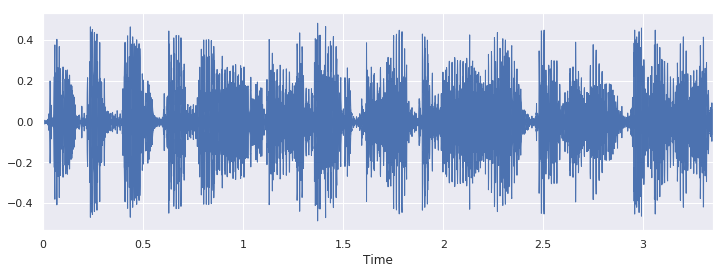

In [22]:
filename = '/home/zuzili/Documents/4.sem.dipl/DOGiJ/Projekt/wav/sm04300104354.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [3]:
import pandas as pd
import os
import librosa

#tokom stvaranje baze sa potrebnim podatcima u biti nije potrebno rayvrstavati u ovome postupku na yvucne i bezvucne
voiced = ['a', 'a:', 'e', 'e:', 'i', 'i:' 'o', 'u', 'u:', 'j', 'l', 'lj', 'r', 'm', 'n', 'nj', 'v', 'z', 'b', 'g', 'd']
voiceless = ['p', 't', 'k', 's', 'f', 'h', 'c']

metadata = pd.read_csv('/home/zuzili/Documents/4.sem.dipl/DOGiJ/Projekt/info.csv')
metadata.head()

for index, row in metadata.iterrows():
    framesfile = row.file_name
    lab_file = '/home/zuzili/Documents/4.sem.dipl/DOGiJ/Projekt/lab/' + framesfile + '.lab'
    f = open(lab_file, "r")
    
    start_ticks = []
    end_ticks = []
    vocals = []
    type_vocal = []
    #obrada podataka za .lab fileove
    for line in f:
        start, end, vocal = line.split()
        vocal = vocal.strip(":")
        vocal = vocal.lower()
        start_ticks.append(start)
        end_ticks.append(end)
        vocals.append(vocal)
        if vocal in voiced:
            # z za zvucni
            type_vocal.append('z')
        elif vocal in voiceless:
            # b za bezzvucni
            type_vocal.append('b')
        else:
            type_vocal.append('undefined')

    df = pd.DataFrame({'start': start_ticks, 'stop': end_ticks, 'vocals': vocals, 'type': type_vocal})
    #obrada podataka za .wav file
    wav_file = '/home/zuzili/Documents/4.sem.dipl/DOGiJ/Projekt/wav/' + framesfile + '.wav'
    y, sr = librosa.load(wav_file)
    
    # izracun mfcc-ova po broju preostalih korisnih podataka, tj koje mozemo koristiti
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = len(df))
    mfcc = mfcc.mean(axis=1)
    
    #dodavanje novog featurea, odnosno delte
    mfcc_delta = librosa.feature.delta(mfcc)

    df['mfcc'] = mfcc
    df['delta'] = mfcc_delta
    #print(mfcc)
    # micanje tisina
    df = df[df.type != 'undefined']
    #print(df)
    # racunanje prosjeka
    mz = df[df.type == 'z'].mean()
    mb = df[df.type == 'b'].mean()
    f = '/home/zuzili/Documents/4.sem.dipl/DOGiJ/Projekt/data.csv'
    import csv
    data = [mz.mfcc, mb.mfcc, mfcc_delta.mean(), mfcc.mean()]
    #spremanje podataka u .csv file
    with open(f,'a') as f:
        writer = csv.writer(f)
        writer.writerows([data])
    f.close()
print("Done extracting features from files.")

Done extracting features from files.


/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


     voiced_mfcc  voiceless_mfcc     delta      mfcc
0      -3.122403       -4.031461  0.243708 -3.058571
1      -1.818955       -7.701097  0.363929 -3.301846
2      -3.844448        0.697768  0.587081 -4.366068
3      -1.121007       -8.367745  0.407644 -3.340661
4      -3.669972       -2.794613  0.384554 -3.422397
5      -3.139725        0.779635  0.416723 -3.743795
6      -1.420708      -14.822532  0.872016 -5.456422
7      -3.652877       -5.075833  0.953335 -5.119410
8      -2.492946       -5.958137  0.534880 -4.714630
9       0.207044       -8.076198  1.066585 -6.159674
10     -3.635900       -2.396400  0.867486 -5.415243
11     -0.850220       -5.630241  0.397540 -3.863229
12     -4.640796       -3.870159  0.660950 -4.356679
13     -2.550850       -2.552506  0.387877 -3.621505
14     -1.972417       -1.329474  0.560592 -3.815716
15      3.447245       -5.456660  1.736181 -5.645622
16     -2.808747       -0.824353  0.362243 -3.489602
17     -4.901234       19.871284  2.319980 -6.

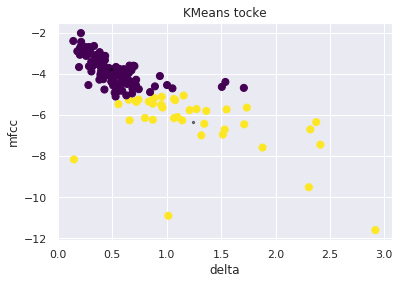

[[ 0.48941176 -3.78884412]
 [ 1.24539467 -6.34975181]]


In [4]:
datafile = "/home/zuzili/Documents/4.sem.dipl/DOGiJ/Projekt/data.csv"
f = open(datafile, "r")

data = pd.read_csv(datafile)

X = data.as_matrix(columns = {'mfcc', 'delta'})

# Učitavanje potrebnih programskih knjižica
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

print(data)
# Kreiranje i treniranje modela
kmeans = KMeans(n_clusters=2)
# Kalkuriranje cluster centre
kmeans.fit(X)

# Traženje predviđenih klasa
y_kmeans = kmeans.predict(X)
#print (y_kmeans)

# Iscrtavanje podataka
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=5, alpha=0.5)
plt.title("KMeans tocke")
plt.xlabel("delta")
plt.ylabel("mfcc")
plt.show()

print(centers)

In [28]:
framesfile = "/home/zuzili/Documents/4.sem.dipl/DOGiJ/Projekt/lab/sm04300104354.lab"
f = open(framesfile, "r")
type_vocal = []
start_ticks = []
end_ticks = []
vocals = []

#tokom stvaranje baze sa potrebnim podatcima u biti nije potrebno rayvrstavati u ovome postupku na yvucne i bezvucne
voiced = ['a', 'a:', 'e', 'e:', 'i', 'i:' 'o', 'u', 'u:', 'j', 'l', 'lj', 'r', 'm', 'n', 'nj', 'v', 'z', 'b', 'g', 'd']
voiceless = ['p', 't', 'k', 's', 'f', 'h', 'c']


#obrada podataka za .lab file

for line in f:
    start, end, vocal = line.split()
    vocal = vocal.strip(":")
    vocal = vocal.lower()
    start_ticks.append(start)
    end_ticks.append(end)
    vocals.append(vocal)
    if vocal in voiced:
        # z za zvucni
        type_vocal.append('z')
    elif vocal in voiceless:
        # b za bezzvucni
        type_vocal.append('b')
    else:
        type_vocal.append('undefined')

df = pd.DataFrame({'start': start_ticks, 'stop': end_ticks, 'vocals': vocals, 'type': type_vocal})

# loading audio file with librosa
y, sr = librosa.load(filename)
# izracun mfcc-ova
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = len(df))
mfcc = mfcc.mean(axis=1)
#dodavanje novog featurea, odnosno delte
mfcc_delta = librosa.feature.delta(mfcc)

df['mfcc'] = mfcc
df['delta'] = mfcc_delta
# micanje tisina
df = df[df.type != 'undefined']

X = df.as_matrix(columns = {'mfcc', 'delta'})
from scipy.spatial import distance

# centar za zvucne ya trenutno pokrenuti KMeans algoritam
cz = centers[:, 0]
# centar za bezzvucne vokale
cb = centers[:, 1]

distance_voiced = []
distance_voiceless = []
#racunanje euclidove udaljenosti od sredista zvucne tocke
for i in range(len(df)):
    distance = plt.mlab.dist(cz, X[i])
    distance_voiced.append(distance)

#racunanje euclidove udaljenosti od sredista bezvucne tocke
for i in range(len(df)):
    distance = plt.mlab.dist(cb, X[i])
    distance_voiceless.append(distance)
    
predicted_class = []

for i in range(len(df)):
    if distance_voiced[i] <= distance_voiceless[i]:
        predicted_class.append('z')
    elif distance_voiced[i] > distance_voiceless[i]:
        predicted_class.append('b')

df['predicted'] = predicted_class

guess = 0 

for index, row in df.iterrows():
    if row.type == row.predicted:
        guess += 1

print(df)
percentage = guess/len(df)
print("Postotak uspjesnosti kvalifikacije za {} datoteku je: {} posto.".format(filename, percentage))

       start      stop vocals type        mfcc     delta predicted
1     240000    880000      u    z  168.380678  3.657116         z
2     880000   1360000      s    b  -54.487427  3.657116         b
3    1360000   2160000      k    b   56.731675  3.657116         z
4    2160000   2480000      l    z  -17.906306  3.657116         b
6    3360000   3920000      p    b   -4.156830 -0.283718         b
7    3920000   4160000      u    z   13.443527 -5.300418         z
8    4160000   4960000      i    z  -14.101237 -1.195114         b
9    4960000   5600000      s    b   -5.747785 -3.750464         b
10   5600000   6160000      t    b   -9.701678 -0.184933         b
11   6160000   6720000      r    z   -8.677394 -0.326710         b
12   6720000   6960000      a    z    0.581303  1.190790         z
13   6960000   7760000      g    z  -20.068628  0.609728         b
14   7760000   8800000      e    z   11.594427  1.339247         z
16  10160000  11120000      s    b   -3.746074 -0.345044      

/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: numpy.hypot
/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: numpy.hypot
/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: numpy.hypot
/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: numpy.hypot
/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: numpy.hypot
/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: numpy.hypot
/home/zuzili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: numpy.hypot